In [38]:
import cv2
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D , ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

input_shape =[150,150,3]
img_width = 150
img_height = 150
batch_size=32

train_data_dir = 'E:/Data_Trained_Deep_Learning/Assignment_3_Flipcart/Train'
validation_data_dir = 'E:/Data_Trained_Deep_Learning/Assignment_3_Flipcart/Validation'

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=[img_width,img_height],
        batch_size=10,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=[img_width,img_height],
        batch_size=10,
        class_mode='binary')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


# Lets Define Our model

In [39]:
model = Sequential()

model.add(Conv2D(16, (3,3) , input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))




model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())


model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range= 30,
        horizontal_flip=True)


train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width,img_height),
        batch_size=batch_size,
        class_mode='binary')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
activation_16 (Activation)   (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 16)        2320      
_________________________________________________________________
activation_17 (Activation)   (None, 72, 72, 16)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 16)        0         
__________

In [40]:
nb_train_samples = 160
nb_validation_samples= 40
batch_size = 32
epochs =30

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)


model.save("E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5")

Epoch 1/30
5/5 [==============================] - 10s 2s/step - loss: 0.9227 - acc: 0.3800 - val_loss: 0.7416 - val_acc: 0.3000
Epoch 2/30
5/5 [==============================] - 1s 130ms/step - loss: 0.7319 - acc: 0.3800 - val_loss: 0.6846 - val_acc: 0.7000
Epoch 3/30
5/5 [==============================] - 1s 122ms/step - loss: 0.6673 - acc: 0.5200 - val_loss: 0.7025 - val_acc: 0.5000
Epoch 4/30
5/5 [==============================] - 1s 119ms/step - loss: 0.6573 - acc: 0.6000 - val_loss: 0.6933 - val_acc: 0.4000
Epoch 5/30
5/5 [==============================] - 1s 118ms/step - loss: 0.6993 - acc: 0.5400 - val_loss: 0.6781 - val_acc: 0.7000
Epoch 6/30
5/5 [==============================] - 1s 117ms/step - loss: 0.6396 - acc: 0.6800 - val_loss: 0.6650 - val_acc: 0.6000
Epoch 7/30
5/5 [==============================] - 1s 120ms/step - loss: 0.7202 - acc: 0.5000 - val_loss: 0.6709 - val_acc: 0.6000
Epoch 8/30
5/5 [==============================] - 1s 134ms/step - loss: 0.6564 - acc: 0.6000

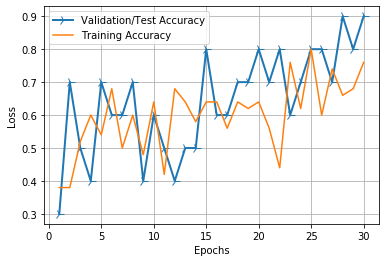

In [41]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1 , len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line1, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


# Lets Create the Next model by using Adam 

In [42]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint , EarlyStopping, ReduceLROnPlateau


model2 = model

model2.compile(loss='binary_crossentropy',optimizer=Adam(lr = 0.0001),metrics=['accuracy'])


checkpoint = ModelCheckpoint(r'E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5' , monitor='val_loss',mode='min',save_best_only=True,verbose=1)

#earlystop = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

#reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_data=0.0001)

callbacks = [checkpoint]

nb_train_samples = 160
nb_validation_samples= 40
batch_size = 32
epochs =20


history = model2.fit_generator(train_generator,steps_per_epoch = nb_train_samples // batch_size,epochs=epochs,validation_data = validation_generator,
                               callbacks=callbacks,
                              validation_steps = nb_validation_samples // batch_size )

Epoch 1/20
5/5 [==============================] - 6s 1s/step - loss: 0.5226 - acc: 0.8000 - val_loss: 0.5910 - val_acc: 0.7000

Epoch 00001: val_loss improved from inf to 0.59099, saving model to E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5
Epoch 2/20
5/5 [==============================] - 1s 117ms/step - loss: 0.5958 - acc: 0.6800 - val_loss: 0.5610 - val_acc: 0.8000

Epoch 00002: val_loss improved from 0.59099 to 0.56097, saving model to E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5
Epoch 3/20
5/5 [==============================] - 1s 114ms/step - loss: 0.6153 - acc: 0.6600 - val_loss: 0.6374 - val_acc: 0.7000

Epoch 00003: val_loss did not improve from 0.56097
Epoch 4/20
5/5 [==============================] - 1s 117ms/step - loss: 0.5396 - acc: 0.7400 - val_loss: 0.5989 - val_acc: 0.8000

Epoch 00004: val_loss did not improve from 0.56097
Epoch 5/20
5/5 [==============================] - 1s 121ms/step - loss: 0.5456 - acc: 0.6800 - val_loss: 0.57

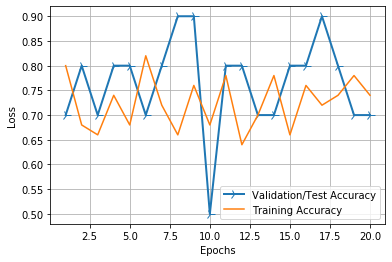

In [43]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1 , len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line1, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


# Lets Create the Next model by using Nadam

In [44]:
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint , EarlyStopping, ReduceLROnPlateau


model3 = model

model3.compile(loss='binary_crossentropy',optimizer=Nadam(lr = 0.0001),metrics=['accuracy'])


checkpoint = ModelCheckpoint(r'E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5' , monitor='val_loss',mode='min',save_best_only=True,verbose=1)

#earlystop = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=10,verbose=1,min_data=0.0001)

callbacks = [checkpoint,reduce_lr]

nb_train_samples = 160
nb_validation_samples= 40
batch_size = 16
epochs =30


history = model2.fit_generator(train_generator,steps_per_epoch = nb_train_samples // batch_size,epochs=epochs,validation_data = validation_generator,
                               callbacks=callbacks,
                              validation_steps = nb_validation_samples // batch_size )

Epoch 1/30
10/10 [==============================] - 7s 665ms/step - loss: 0.5580 - acc: 0.6600 - val_loss: 0.5942 - val_acc: 0.7000

Epoch 00001: val_loss improved from inf to 0.59417, saving model to E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5
Epoch 2/30
10/10 [==============================] - 1s 125ms/step - loss: 0.5099 - acc: 0.7000 - val_loss: 0.4949 - val_acc: 0.8000

Epoch 00002: val_loss improved from 0.59417 to 0.49486, saving model to E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5
Epoch 3/30
10/10 [==============================] - 1s 120ms/step - loss: 0.5359 - acc: 0.7000 - val_loss: 0.4862 - val_acc: 0.9000

Epoch 00003: val_loss improved from 0.49486 to 0.48622, saving model to E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5
Epoch 4/30
10/10 [==============================] - 1s 119ms/step - loss: 0.4926 - acc: 0.7700 - val_loss: 0.6059 - val_acc: 0.7000

Epoch 00004: val_loss did not improve from 0.48622
Epoch 5/30
10

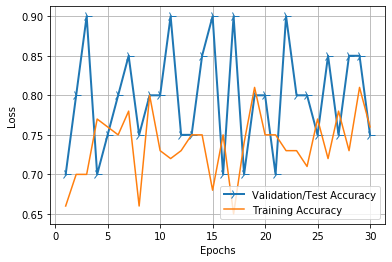

In [45]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1 , len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line1, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


# Lets Create the Next model by using Rmsporp

In [46]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint , EarlyStopping, ReduceLROnPlateau


model4 = model

model4.compile(loss='binary_crossentropy',optimizer=RMSprop(lr = 0.01),metrics=['accuracy'])


checkpoint = ModelCheckpoint(r'E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5' , monitor='val_loss',mode='min',save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_data=0.0001)

callbacks = [checkpoint,reduce_lr,earlystop]

nb_train_samples = 160
nb_validation_samples= 40
batch_size = 16
epochs =30


history = model2.fit_generator(train_generator,steps_per_epoch = nb_train_samples // batch_size,epochs=epochs,validation_data = validation_generator,
                               callbacks=callbacks,
                              validation_steps = nb_validation_samples // batch_size )

Epoch 1/30
10/10 [==============================] - 7s 656ms/step - loss: 4.3762 - acc: 0.5200 - val_loss: 0.6750 - val_acc: 0.5500

Epoch 00001: val_loss improved from inf to 0.67500, saving model to E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5
Epoch 2/30
10/10 [==============================] - 1s 117ms/step - loss: 0.8162 - acc: 0.4500 - val_loss: 0.6953 - val_acc: 0.5000

Epoch 00002: val_loss did not improve from 0.67500
Epoch 3/30
10/10 [==============================] - 1s 129ms/step - loss: 0.6964 - acc: 0.5800 - val_loss: 0.6983 - val_acc: 0.3500

Epoch 00003: val_loss did not improve from 0.67500
Epoch 4/30
10/10 [==============================] - 1s 118ms/step - loss: 0.7099 - acc: 0.6100 - val_loss: 0.6922 - val_acc: 0.5000

Epoch 00004: val_loss did not improve from 0.67500

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


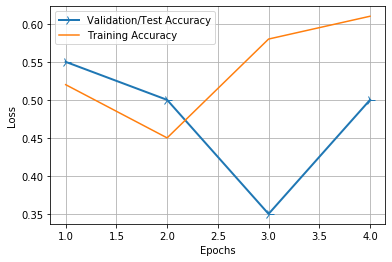

In [47]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1 , len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line1, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


# Lets Create the Next model by using Nesterov Accelerated Gradient Descent

In [52]:
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint , EarlyStopping, ReduceLROnPlateau


model5 = model

model5.compile(loss='binary_crossentropy',optimizer=SGD(lr = 0.01),metrics=['accuracy'])


checkpoint = ModelCheckpoint(r'E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5' , monitor='val_loss',mode='min',save_best_only=True,verbose=1)

##earlystop = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_data=0.0001)

callbacks = [checkpoint,reduce_lr,earlystop]

nb_train_samples = 160
nb_validation_samples= 40
batch_size = 16
epochs =30


history = model2.fit_generator(train_generator,steps_per_epoch = nb_train_samples // batch_size,epochs=epochs,validation_data = validation_generator,
                               callbacks=callbacks,
                              validation_steps = nb_validation_samples // batch_size )

Epoch 1/30
10/10 [==============================] - 9s 867ms/step - loss: 0.7110 - acc: 0.5800 - val_loss: 0.6957 - val_acc: 0.4500

Epoch 00001: val_loss improved from inf to 0.69567, saving model to E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5
Epoch 2/30
10/10 [==============================] - 1s 116ms/step - loss: 0.6713 - acc: 0.6600 - val_loss: 0.6720 - val_acc: 0.6500

Epoch 00002: val_loss improved from 0.69567 to 0.67199, saving model to E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5
Epoch 3/30
10/10 [==============================] - 1s 124ms/step - loss: 0.6635 - acc: 0.6800 - val_loss: 0.6379 - val_acc: 0.8000

Epoch 00003: val_loss improved from 0.67199 to 0.63795, saving model to E:/Data_Trained_Deep_Learning/Assignment 4/Jeans_Vs_Trousers.h5
Epoch 4/30
10/10 [==============================] - 1s 128ms/step - loss: 0.6255 - acc: 0.6900 - val_loss: 0.6197 - val_acc: 0.9000

Epoch 00004: val_loss improved from 0.63795 to 0.61969, saving m

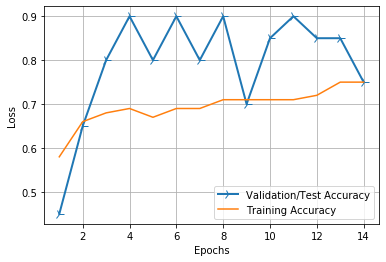

In [53]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1 , len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line1, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()
